In [1]:
import math
import numpy as np
from numpy.random import default_rng

import scipy
from scipy.stats import qmc
from smt.sampling_methods import LHS

from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA

import time
import os
%matplotlib inline 
font = {'size'   : 30}
matplotlib.rc('font', **font)
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-2,2))

# seeds
np.random.seed(125)
rng = default_rng(125)

In [2]:
def pad_arrays_with_last_value(arr_list):
    """
    Takes a list of 1D numpy arrays of varying lengths,
    pads each array to the length of the longest array using the last value,
    and returns a 2D numpy array with each row as a padded array.
    """
    max_len = max(len(arr) for arr in arr_list)
    padded_array = np.zeros((len(arr_list), max_len))

    for i, arr in enumerate(arr_list):
        fill_len = max_len - len(arr)
        if fill_len > 0:
            pad_value = arr[-1]
            padded_arr = np.concatenate([arr, np.full(fill_len, pad_value)])
        else:
            padded_arr = arr
        padded_array[i, :] = padded_arr

    return padded_array

In [3]:
total_data  = [np.load('data/ALAEmGP-3dSynthetic-repeat'+str(i)+'-testrmse.npy') for i in range(10)]
rtotal_data = [np.load('data/ALAEmGP-3dSynthetic-repeat'+str(i)+'-rtestrmse.npy') for i in range(10)]

In [4]:
plot_data = pad_arrays_with_last_value(total_data) # N by T
plot_range = range(plot_data.shape[1])
plot_mean = plot_data.mean(axis=0)
plot_std = plot_data.std(axis=0)

rplot_data = pad_arrays_with_last_value(rtotal_data)
rplot_range = range(rplot_data.shape[1])
rplot_mean = rplot_data.mean(axis=0)
rplot_std = rplot_data.std(axis=0)

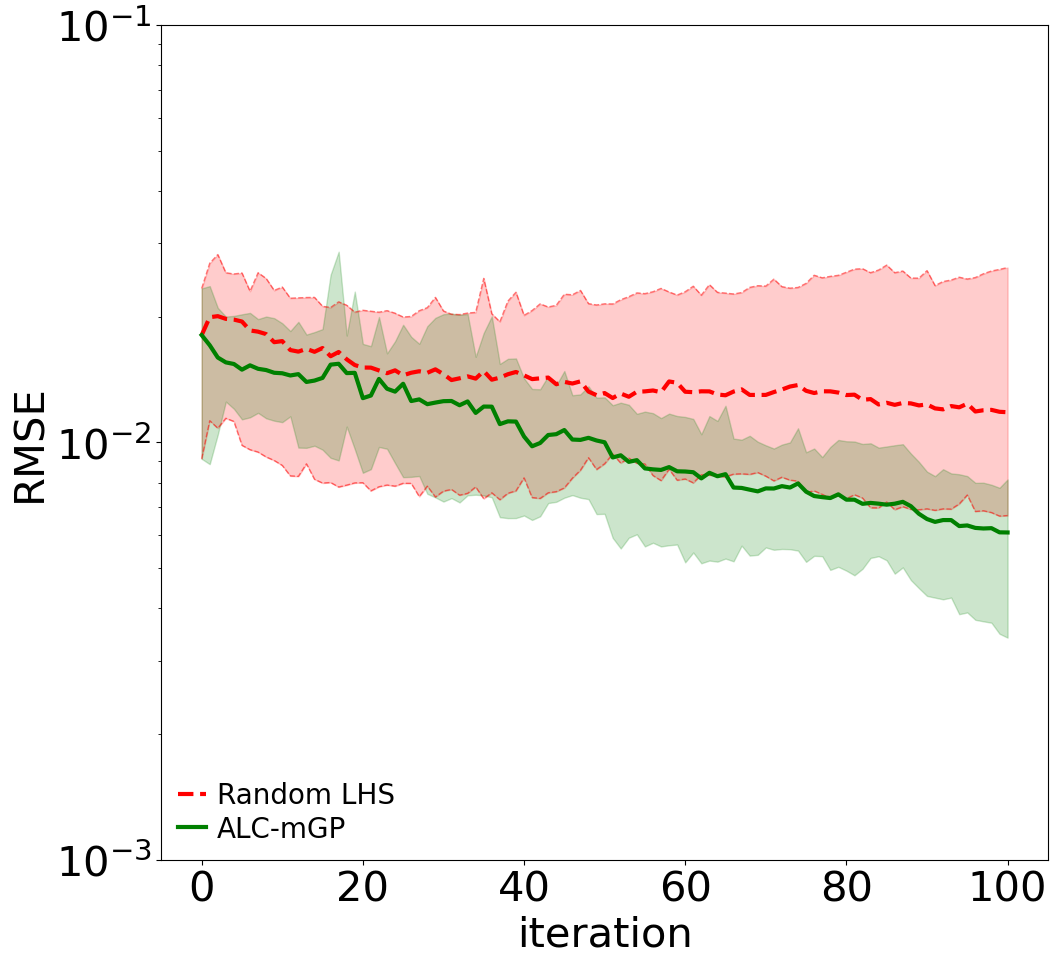

In [11]:
# Global settings
font = {'size': 30}
matplotlib.rc('font', **font)

cbformat = matplotlib.ticker.ScalarFormatter()
cbformat.set_powerlimits((-2, 2))

figsize = (11.82, 11.13)

# Adjust content box within figure
adjust_params = dict(left=0.2, bottom=0.2, right=0.95, top=0.95)

fig, ax = plt.subplots(figsize=figsize)
fig.subplots_adjust(**adjust_params)

# green predicted line
ax.plot(rplot_range, rplot_mean, linewidth=3, label='Random LHS', linestyle='--', c='red')

# green fill + dotted boundary
ax.fill_between(rplot_range, np.array(rplot_data).min(axis=0), np.array(rplot_data).max(axis=0),
                alpha=0.2, color='red')

# manually plot the boundaries with dotted lines
ax.plot(rplot_range, np.array(rtotal_data).min(axis=0), linestyle='--', alpha = 0.5, color='red', linewidth=1)
ax.plot(rplot_range, np.array(rtotal_data).max(axis=0), linestyle='--', alpha = 0.5, color='red', linewidth=1)

# red predicted line
ax.plot(plot_range, plot_mean, linewidth=3, label='ALC-mGP', c='green')

# red fill (no boundary)
ax.fill_between(plot_range, np.array(plot_data).min(axis=0), np.array(plot_data).max(axis=0),
                alpha=0.2, color='green')
#ax.fill_between(plot_range, np.array(plot_data).min(axis=0)*np.array([np.pow(np.exp(np.log(0.5)/100),i) for i in range(101)]), np.array(plot_data).max(axis=0)*np.array([np.pow(np.exp(np.log(0.5)/100),i) for i in range(101)]),
#                alpha=0.2, label='variance', color='green')
ax.set_ylim(1e-3, 1e-1)
ax.set_yticks([5e-2, 1e-2, 2e-3])
ax.set_yscale('log')

legend = ax.legend(    
    loc='lower left',
    fontsize=20,          # 缩小文字
    markerscale=1,        # 缩小图例中 marker 的缩放
    handlelength=1.0,     # 缩短图例线条
    handletextpad=0.4,    # 图形和文字之间的间隔
    labelspacing=0.2,     # 不同行之间的垂直间隔
    borderpad=0.3,        # 图例边框与内容的间隔
    borderaxespad=0.3,    # 图例边框与主图之间的间距)
)
legend.get_frame().set_linewidth(0)  # 无边框线宽
legend.get_frame().set_edgecolor('none')  # 无边框颜色
legend.get_frame().set_facecolor('none')  # 无背景色（透明）

ax.set_xlabel('iteration')
ax.set_ylabel('RMSE')
plt.savefig('ALAEmGP-3dSphere-RMSE-shades-minmax.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [6]:
plot_mean[-1]

np.float64(0.00608238837635949)